In [2]:
import cv2
from datetime import datetime

In [38]:
#from cv2 import *, 
# initialize the camera
    
# frame captured without any errors
#cv2.namedWindow("cam-test", cv2.CV_WINDOW_AUTOSIZE)
#cv2.imshow("cam-test",img)
#cv2.waitKey(1)
#cv2.destroyWindow("cam-test")

In [1028]:
# take photos for dataset

current_class_name = 'biting'

path_to_data = '../raw_data/image_dataset'

def add_photo_to_dataset(path_to_data, current_class_name):
    cam = cv2.VideoCapture(0)   # 0 -> index of camera
    s, img = cam.read()
    if s:
        file_name = f"{path_to_data}/{current_class_name}/{str(datetime.now())}.jpg"
        cv2.imwrite(file_name, img) #save image
        
#add_photo_to_dataset('../raw_data/image_dataset', 'biting')

In [1029]:
!ls ../raw_data/image_dataset/biting

2022-06-10 00:13:37.901507.jpg      2022-06-10 00:16:22.015950.jpg
2022-06-10 00:13:38.167829.jpg      2022-06-10 00:16:22.194400.jpg
2022-06-10 00:13:38.366492.jpg      2022-06-10 00:16:22.881377.jpg
2022-06-10 00:13:38.866947.jpg      2022-06-10 00:16:23.133692.jpg
2022-06-10 00:13:39.167266.jpg      2022-06-10 00:16:23.323448.jpg
2022-06-10 00:13:39.423133.jpg      2022-06-10 00:16:23.632070.jpg
2022-06-10 00:13:39.688907.jpg      2022-06-10 00:16:23.825346.jpg
2022-06-10 00:13:39.899186.jpg      2022-06-10 00:16:24.194311.jpg
2022-06-10 00:13:40.156186.jpg      2022-06-10 00:16:24.443915.jpg
2022-06-10 00:13:40.397059.jpg      2022-06-10 00:16:24.883160.jpg
2022-06-10 00:13:41.255120.jpg      2022-06-10 00:16:25.076859.jpg
2022-06-10 00:13:41.489421.jpg      2022-06-10 00:16:25.818633.jpg
2022-06-10 00:13:41.690914.jpg      2022-06-10 00:16:26.201331.jpg
2022-06-10 00:13:41.899568.jpg      2022-06-10 00:16:26.507475.jpg
2022-06-10 00:13:42.132466.jpg      2022-06-10 00:16:26.761022

In [20]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img.shape

(720, 1280)

In [21]:
import numpy as np
np.min(img/255), np.max(img/255)

(0.011764705882352941, 1.0)

In [25]:
from tensorflow.keras.utils import image_dataset_from_directory

In [26]:
path_to_data = '../raw_data/image_dataset'

class_names = ['no_biting', 'biting']

train_ds = image_dataset_from_directory(
    path_to_data,
    labels='inferred',
    label_mode='binary',
    class_names=['no_biting', 'biting'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training",
)

val_ds = image_dataset_from_directory(
    path_to_data,
    labels='inferred',
    label_mode='binary',
    class_names=['no_biting', 'biting'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation",
)

Found 1055 files belonging to 2 classes.
Using 844 files for training.
Found 1055 files belonging to 2 classes.
Using 211 files for validation.


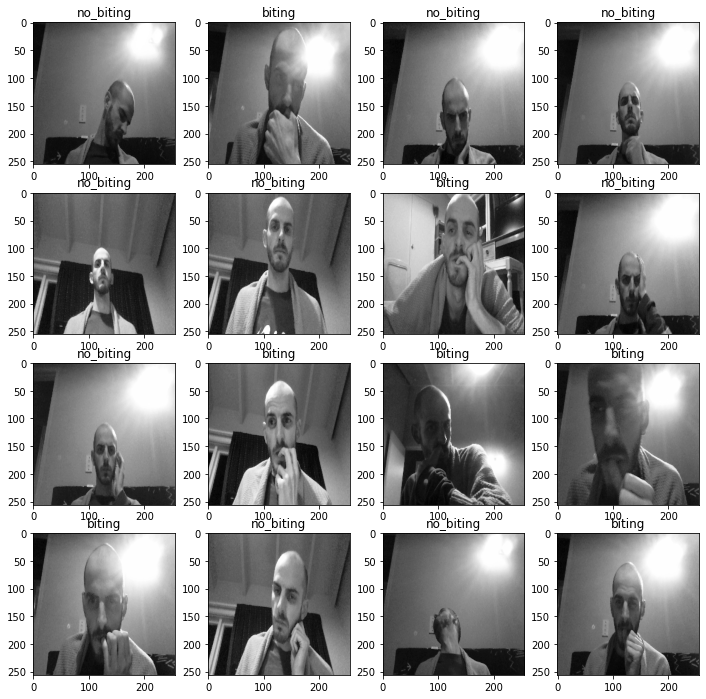

In [5]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 4, figsize = (12, 12))

for x_batch, y_batch in train_ds.take(1).as_numpy_iterator():
    for img, label, ax in zip(x_batch, y_batch, axes.flat):
        ax.imshow(img, cmap = 'Greys_r')
        ax.set_title(f'{class_names[int(label)]}')


In [13]:
x_batch.shape

(32, 256, 256, 1)

In [6]:
#!pip install -U tensorflow

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling, Resizing
from tensorflow.keras.layers import RandomBrightness, RandomContrast, RandomZoom, RandomRotation, RandomTranslation, RandomFlip


In [77]:
!ls ../raw_data/preprocessed_image_dataset

biting    no_biting


In [78]:
from tensorflow.keras.utils import save_img, load_img
from tensorflow.image import rgb_to_grayscale 
import os
import numpy as np

# greyscale & shrink images for upload
preprocess = Sequential([
    Rescaling(1/255),
    Resizing(256, 256)
])

class_names = ['no_biting', 'biting']

load_path = '../raw_data/image_dataset'

save_path = '../raw_data/preprocessed_image_dataset'


In [ ]:
from tqdm import tqdm

for file in tqdm(os.listdir(f"{load_path}/{class_names[1]}")):
    if file.endswith('.jpg'):
        img = load_img(f'{load_path}/{class_names[1]}/{file}')
        preprocessed_img = preprocess(np.expand_dims(img, 0))
        bw_img = rgb_to_grayscale(preprocessed_img).numpy().reshape(256, 256, 1)
        save_img(f'{save_path}/{class_names[1]}/{file}', bw_img)

 41%|████████████████▉                        | 228/551 [00:09<00:12, 26.05it/s]

In [62]:
# order of data augmentation? brightness & contrast

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.metrics import Precision, Recall

model = Sequential([
    Rescaling(1/255),
    #RandomBrightness(factor = 0.2, value_range = (0, 1)),
    #RandomContrast(0.2),
    #RandomZoom(0.2),
    #RandomRotation(0.2),
    #RandomTranslation(0.2, 0.2),
    #RandomFlip('horizontal_and_vertical'),
    Conv2D(16, (10, 10), activation = 'relu', input_shape = (256, 256, 1)),
    MaxPooling2D(2),
    Conv2D(16, (10, 10), activation = 'relu'),
    MaxPooling2D(2),
    Flatten(),
    Dense(50, activation = 'relu'),
    Dense(1, activation ='sigmoid'),
])

model.compile(loss = 'binary_crossentropy',
             optimizer = Adam(0.1),
             metrics = ['accuracy',Precision(), Recall()])

In [63]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience = 5, restore_best_weights = True)

model.fit(train_ds,
         validation_data = val_ds,
         epochs = 1,
         callbacks = [es])

KeyboardInterrupt: 

In [31]:
model.history.history

{'loss': [4526.84521484375],
 'accuracy': [0.4976303279399872],
 'precision': [0.5256673693656921],
 'recall': [0.570155918598175],
 'val_loss': [33.88689041137695],
 'val_accuracy': [0.5165876746177673],
 'val_precision': [0.0],
 'val_recall': [0.0]}